# IMPORTING LIBRARIES

In [56]:
import numpy as np
import pandas as pd

# IMPORTING THE DATASET

In [57]:
df=pd.read_csv(r"C:\Users\KIIT\Desktop\Indian Liver Patient Dataset (ILPD).csv")
df.head()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [58]:
df.isnull().sum()

age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             4
is_patient          0
dtype: int64

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

1    416
2    167
Name: is_patient, dtype: int64

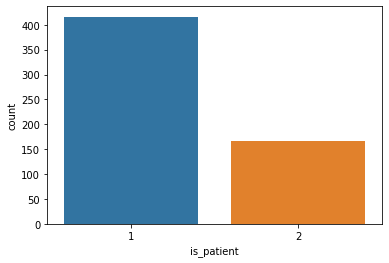

In [60]:
sns.countplot(x ='is_patient',data=df)
df['is_patient'].value_counts()

<AxesSubplot:xlabel='age', ylabel='is_patient'>

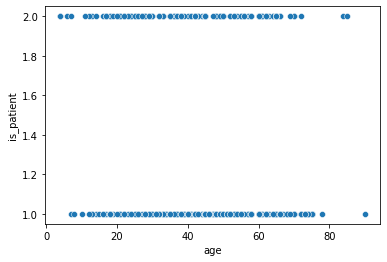

In [61]:
sns.scatterplot(x ='age',y='is_patient',data=df)

Number of males:  441
Number of females:  142


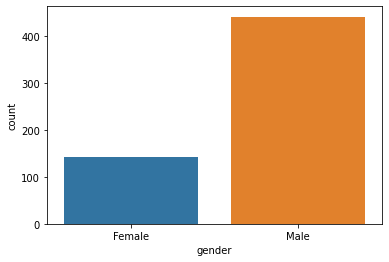

In [62]:
sns.countplot(x ='gender',label='Count',data=df)
M, F = df['gender'].value_counts()
print('Number of males: ',M)
print('Number of females: ',F)

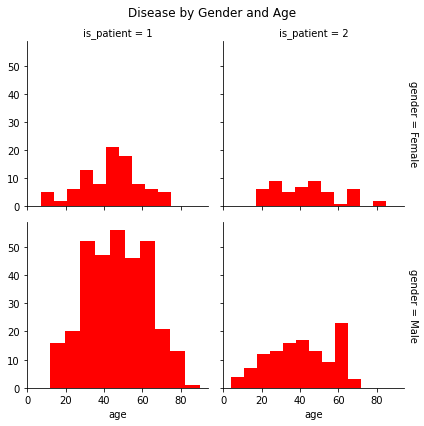

In [63]:
g = sns.FacetGrid(df, col="is_patient", row="gender", margin_titles=True)
g.map(plt.hist, "age", color="red")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Disease by Gender and Age');

In [64]:
df1=df.copy() #Copying the dataset

# TRAIN-TEST-SPLIT

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
train, val= train_test_split(df, test_size=0.3, random_state=1)
print(train.shape)
print(val.shape)

(408, 11)
(175, 11)


# FINDING CORRELATION

<AxesSubplot:>

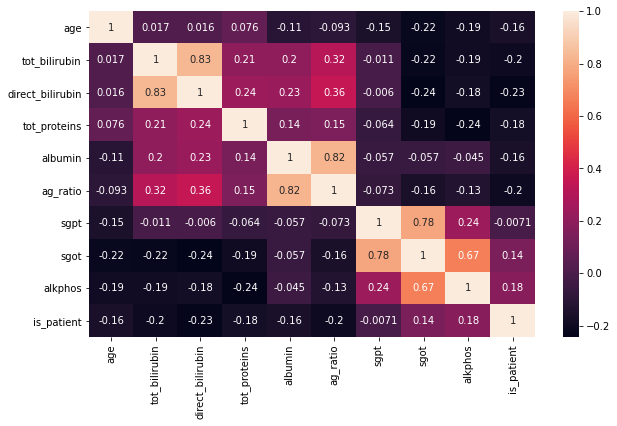

In [67]:
cor = train.corr()
plt.figure(figsize = (10,6))
sns.heatmap(cor, annot = True)

# FEATURE SELECTION

In [68]:
def handling_correlation(df,threshold=0.7):
    # creating set to hold the correlated features
    corr_features = set()
    # create the correlation matrix (default to pearson)
    corr_matrix = train.corr()
    #code for selecting all correleated features
    for i in range(len(corr_matrix .columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >threshold:
                colname = corr_matrix.columns[i]
                corr_features.add(colname)
    return list(corr_features)

In [69]:
handling_correlation(train.copy(),0.7)

['ag_ratio', 'sgot', 'direct_bilirubin']

In [70]:
feature_cols=['ag_ratio', 'sgot', 'direct_bilirubin'] #Bucketing the selected features

In [71]:
x=train[feature_cols]

In [72]:
y=train['is_patient']

In [73]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y)

# TRAINING WITH RANDOM FOREST 

In [74]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=500, criterion='entropy', random_state=0)
model.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=500, random_state=0)

In [75]:
train_accuracy = model.score(X_train, Y_train)
print('Train-set accuracy \t: ', train_accuracy)
test_accuracy = model.score(X_test, Y_test)
print('Test-set accuracy \t: ', test_accuracy)

Train-set accuracy 	:  0.9967320261437909
Test-set accuracy 	:  0.6862745098039216


# TRAINING WITH DECISION TREE

In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
#X_trainset, X_testset, y_trainset, y_testset = train_test_split(x, y, test_size=0.2, random_state=5)
liverDiseaseTree = DecisionTreeClassifier(criterion='entropy',max_depth=7)
liverDiseaseTree.fit(X_train,Y_train)
liverDiseaseTree

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [77]:
train_accuracy = model.score(X_train, Y_train)
print('Train-set accuracy \t: ', train_accuracy)
test_accuracy = model.score(X_test, Y_test)
print('Test-set accuracy \t: ', test_accuracy)

Train-set accuracy 	:  0.9967320261437909
Test-set accuracy 	:  0.6862745098039216
